<a href="https://colab.research.google.com/github/prxska/Ev3MachineLearning/blob/main/regresionMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

# Subir el archivo desde tu computadora
uploaded = files.upload()

# Get the name of the uploaded file
# files.upload() returns a dictionary where keys are filenames
uploaded_filename = list(uploaded.keys())[0]

# Cargar el CSV al DataFrame (usando el nombre del archivo subido)
# Use the actual uploaded_filename instead of the hardcoded name
df = pd.read_csv(uploaded_filename, sep=';')

# Limpiar columnas: convertir valores numéricos escritos como string
df['TravelledDistance'] = df['TravelledDistance'].astype(str).str.replace('.', '', regex=False)
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['RoundStartingEquipmentValue'] = pd.to_numeric(df['RoundStartingEquipmentValue'], errors='coerce')

# Eliminar valores nulos
df = df.dropna(subset=['TravelledDistance', 'RoundStartingEquipmentValue'])

# Ver las primeras filas
df[['RoundStartingEquipmentValue', 'TravelledDistance']].head()

Saving Anexo_ET_demo_round_traces_2022.csv to Anexo_ET_demo_round_traces_2022.csv


<ipython-input-1-0fa6240777f3>:13: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(uploaded_filename, sep=';')


,RoundStartingEquipmentValue,TravelledDistance
0,750,1.008314e+16
1,800,6.096088e+16
2,1000,5.642252e+15
3,850,8.963473e+15
4,1000,1.086565e+16


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Aplicar transformación logarítmica a la variable objetivo
df['LogTravelledDistance'] = np.log1p(df['TravelledDistance'])

# Eliminar valores infinitos o NaN resultantes de la transformación
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['LogTravelledDistance', 'RoundStartingEquipmentValue', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown'])

# Definir X e y
X_mult = df[['RoundStartingEquipmentValue', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown']]
y_mult = df['LogTravelledDistance']

# División entrenamiento/prueba
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_mult, y_mult, test_size=0.2, random_state=42)

# Entrenamiento del modelo
model_mult = LinearRegression()
model_mult.fit(X_train_m, y_train_m)

# Predicciones
y_pred_m = model_mult.predict(X_test_m)

# Evaluación
print("MSE (regresión múltiple - log):", mean_squared_error(y_test_m, y_pred_m))
print("R² (regresión múltiple - log):", r2_score(y_test_m, y_pred_m))

# Coeficientes
print("\nCoeficientes del modelo:")
for feature, coef in zip(X_mult.columns, model_mult.coef_):
    print(f"{feature}: {coef}")

MSE (regresión múltiple - log): 5.6434506513023575
R² (regresión múltiple - log): 0.0038125956811706496

Coeficientes del modelo:
RoundStartingEquipmentValue: 1.7003331103588974e-05
RLethalGrenadesThrown: 0.10522315531512952
RNonLethalGrenadesThrown: 0.09573615661036952


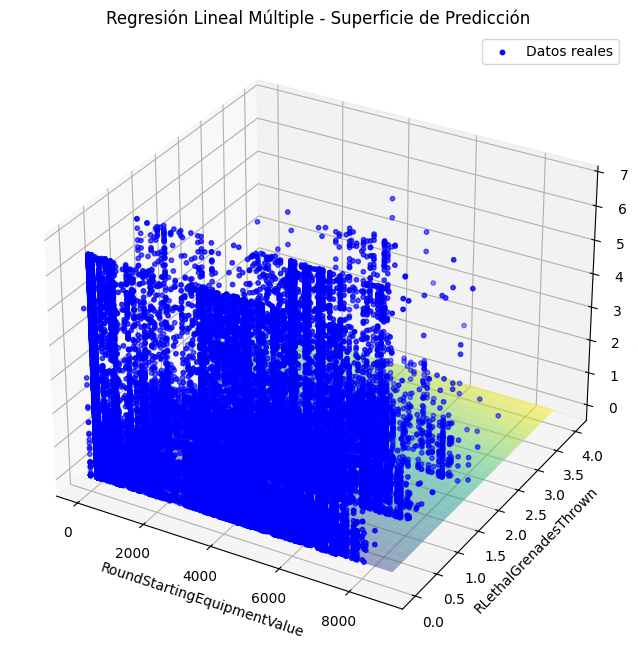

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Seleccionar solo dos variables para graficar
x1 = df['RoundStartingEquipmentValue']
x2 = df['RLethalGrenadesThrown']
y = df['TravelledDistance']

# Crear grid para superficie de predicción
x1_grid, x2_grid = np.meshgrid(
    np.linspace(x1.min(), x1.max(), 30),
    np.linspace(x2.min(), x2.max(), 30)
)

# Aplanar y combinar para hacer predicciones
X_grid = pd.DataFrame({
    'RoundStartingEquipmentValue': x1_grid.ravel(),
    'RLethalGrenadesThrown': x2_grid.ravel(),
    'RNonLethalGrenadesThrown': np.full_like(x1_grid.ravel(), df['RNonLethalGrenadesThrown'].mean())  # se fija en promedio
})

# Predicción sobre la grilla
y_pred_grid = model_mult.predict(X_grid)
y_pred_grid = y_pred_grid.reshape(x1_grid.shape)

# Graficar
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1_grid, x2_grid, y_pred_grid, alpha=0.5, cmap='viridis')
ax.scatter(x1, x2, y, color='blue', s=10, label='Datos reales')

ax.set_xlabel('RoundStartingEquipmentValue')
ax.set_ylabel('RLethalGrenadesThrown')
ax.set_zlabel('TravelledDistance')
ax.set_title('Regresión Lineal Múltiple - Superficie de Predicción')
plt.legend()
plt.show()